In [17]:
import pandas as pd
import pipeline_v
import pipeline_0
import numpy as np
from typing import List, Optional, Tuple
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [44]:
df_raw = pd.read_csv("ressources/data/bienIci_2458.csv")

In [45]:
df_raw.head()

,transactionType,rentWithoutCharges,charges,energyPerformanceDiagnosticDate,title,heating,district.name,hasTerrace,greenhouseGazClassification,greenhouseGazValue,...,bedroomsQuantity,descriptionTextLength,postalCodeForSearchFilters,price,city,blurInfo.type,status.onTheMarket,district.libelle,blurInfo.centroid.lon,hasElevator
0,rent,1771.0,NaN,2023-09-19,Exclusivité- Appartement meublé- Paris XV,électricité individuel,Paris 15e Arrondissement - Cambronne - Garibaldi,NaN,B,6.0,...,1.0,667,75015,1771.0,Paris 15e,disk,True,Cambronne - Garibaldi,2.303488,NaN
1,rent,1500.0,450.0,2024-06-25,2 pièces avec terrasse - Paris 15,radiateur gaz collectif,Paris 15e Arrondissement - Alleray - Procession,True,C,29.0,...,1.0,474,75015,1950.0,Paris 15e,disk,True,Alleray - Procession,2.304538,True
2,rent,13000.0,NaN,2025-07-06,Appartement exceptionnel- Paris VIII,NaN,Paris 8e Arrondissement - Hoche Friedland,True,D,33.0,...,4.0,850,75008,13000.0,Paris 8e,disk,True,Hoche Friedland,2.299560,NaN
3,rent,3800.0,NaN,2025-12-02,Appartement meublé - Paris 14ème,NaN,Paris 14e Arrondissement - Montsouris - Dareau,NaN,D,34.0,...,2.0,701,75014,3800.0,Paris 14e,disk,True,Montsouris - Dareau,2.335510,NaN
4,rent,866.0,NaN,2023-02-20,STUDIO-ILES SAINT LOUIS,NaN,Paris 4e Arrondissement - Les Iles,NaN,B,11.0,...,0.0,311,75004,866.0,Paris 4e,disk,True,Les Iles,2.354162,NaN


In [46]:
df_p0 = pipeline_0.run_pipeline(df=df_raw)

In [47]:
df_p0.head()

,transactionType,rentWithoutCharges,charges,energyPerformanceDiagnosticDate,title,heating,district.name,hasTerrace,greenhouseGazClassification,greenhouseGazValue,...,computedToiletQuantity,computedPriceHasDecreased,computedEnergyValue,computedEnergyClassification,computedMinEnergyConsumption,computedMaxEnergyConsumption,computedAvgEnergyConsumption,computedNewProperty,computedHasElevator,computedHasTerrace
0,rent,1771.0,NaN,2023-09-19,Exclusivité- Appartement meublé- Paris XV,électricité individuel,Paris 15e Arrondissement - Cambronne - Garibaldi,<NA>,B,6.0,...,1.0,False,200.0,D,8100.0,11250.0,9675.0,False,False,False
1,rent,1500.0,450.0,2024-06-25,2 pièces avec terrasse - Paris 15,radiateur gaz collectif,Paris 15e Arrondissement - Alleray - Procession,True,C,29.0,...,1.0,False,183.0,D,520.0,710.0,615.0,False,True,True
2,rent,13000.0,NaN,2025-07-06,Appartement exceptionnel- Paris VIII,NaN,Paris 8e Arrondissement - Hoche Friedland,True,D,33.0,...,1.0,False,158.0,D,1900.0,2590.0,2245.0,False,False,True
3,rent,3800.0,NaN,2025-12-02,Appartement meublé - Paris 14ème,NaN,Paris 14e Arrondissement - Montsouris - Dareau,<NA>,D,34.0,...,1.0,False,162.0,D,18360.0,25500.0,21930.0,False,False,False
4,rent,866.0,NaN,2023-02-20,STUDIO-ILES SAINT LOUIS,NaN,Paris 4e Arrondissement - Les Iles,<NA>,B,11.0,...,1.0,True,361.0,E,430.0,620.0,525.0,False,False,False


In [48]:
X,y = pipeline_v.prepareDataset(df = df_p0)

In [49]:
df_pv = pd.concat([X,y],axis=1)

In [50]:
df_pv.head()

,postal_code,transaction_type,city,property_type,heating,exposition,energy_class,ghg_class,is_new,has_elevator,...,bedrooms,floor,bathrooms,shower_rooms,toilets,energy_value,energy_min,energy_max,ghg_value,price_per_sqm
0,75015,rent,Paris 15e,flat,électricité individuel,__UNKNOWN__,D,B,False,False,...,1.0,2.0,1.0,1.0,1.0,200.0,8100.0,11250.0,6.0,39.355556
1,75015,rent,Paris 15e,flat,radiateur gaz collectif,ouest,D,C,False,True,...,1.0,8.0,1.0,1.0,1.0,183.0,520.0,710.0,29.0,48.750000
2,75008,rent,Paris 8e,flat,__UNKNOWN__,__UNKNOWN__,D,D,False,False,...,4.0,0.0,2.0,2.0,1.0,158.0,1900.0,2590.0,33.0,100.000000
3,75014,rent,Paris 14e,flat,__UNKNOWN__,__UNKNOWN__,D,D,False,False,...,2.0,1.0,2.0,2.0,1.0,162.0,18360.0,25500.0,34.0,37.254902
4,75004,rent,Paris 4e,flat,__UNKNOWN__,__UNKNOWN__,E,B,False,False,...,0.0,NaN,1.0,1.0,1.0,361.0,430.0,620.0,11.0,50.941176


In [51]:
df_pv.dtypes

postal_code         string[python]
transaction_type    string[python]
city                string[python]
property_type       string[python]
heating             string[python]
exposition          string[python]
energy_class        string[python]
ghg_class           string[python]
is_new                     boolean
has_elevator               boolean
has_terrace                boolean
lat                        float64
lon                        float64
surface_area               float64
rooms                      float64
bedrooms                   float64
floor                      float64
bathrooms                  float64
shower_rooms               float64
toilets                    float64
energy_value               Float64
energy_min                 Float64
energy_max                 Float64
ghg_value                  float64
price_per_sqm              float64
dtype: object

In [52]:
CATEGORICAL = [
    'transaction_type',
    'postal_code',
    'city',
    'property_type',
    'heating',
    'exposition',
    'energy_class',
    'ghg_class'
]

In [60]:
def train_catboost_regressor(   
    X: pd.DataFrame,
    y: pd.Series,
    cat_cols: List[str],
    model_path: Optional[str] = None,     # if provided -> load instead of train
    save_path: Optional[str] = None,
    test_size: float = 0.2,
    seed: int = 7,
    model_params: Optional[dict] = None,
    early_stopping_rounds: int = 100
):
    #quick preprocess/clean/cast...
    X = X.copy()
    y = pd.to_numeric(y, errors="coerce")
    m = y.notna()
    X, y = X.loc[m], y.loc[m].astype(float)
    for c in cat_cols :
        X[c] = X[c].astype("string")
    #split
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=test_size, random_state=seed
    )
    #get cat indexes
    cat_idxs = [X.columns.get_loc(c) for c in cat_cols if c in X.columns]
    #indicate which are categorical cols
    train_pool = Pool(X_train, y_train, cat_features=cat_idxs)
    valid_pool = Pool(X_valid, y_valid, cat_features=cat_idxs)

    #build model parameters
    params = dict(
        loss_function="MAE",
        iterations=2000,
        learning_rate=0.05,
        depth=8,
        random_seed=seed,
        verbose=200,
        task_type="GPU"
    )
    #update params if function received params
    if model_params:
        params.update(model_params)

    #get base model and load trained model if function receive model path
    base_model = None
    if model_path:
        base_model = CatBoostRegressor()
        base_model.load_model(model_path)
    
        expected = base_model.feature_names_
        for c in expected:
            if c not in X.columns:
                X[c] = pd.NA
        X = X[expected]  # reorder + drop extras

    #load params to model
    model = CatBoostRegressor(**params)
    
    #train/fit model
    model.fit(
        train_pool,
        eval_set=valid_pool,
        use_best_model=True,
        early_stopping_rounds=early_stopping_rounds,
        init_model=base_model,   # <-- continue from loaded model if provided
    )

    mae = float(mean_absolute_error(y_valid, model.predict(valid_pool)))

    if save_path:
        model.save_model(save_path)

    return model, mae

In [54]:
def load_catboost(model_path:str):
    model = CatBoostRegressor()
    model.load_model(model_path)
    return model

In [55]:
def predict(
    model: CatBoostRegressor,
    X: pd.DataFrame,
    cat_cols: List[str],
):
    X = X.copy()
    for c in cat_cols:
        if c in X.columns:
            X[c] = X[c].astype("string")
    cat_idxs = [X.columns.get_loc(c) for c in cat_cols if c in X.columns]
    return model.predict(Pool(X, cat_features=cat_idxs))


In [58]:
set(renamed_cats) == set(CATEGORICAL)

True

In [61]:
catboost_model, mae = train_catboost_regressor(X=X,y=y,cat_cols=CATEGORICAL,save_path = "models/catboost/catboost_v1.cbm")


Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 10.9101967	test: 11.7248287	best: 11.7248287 (0)	total: 121ms	remaining: 4m 1s
200:	learn: 8.9365376	test: 9.7188804	best: 9.7188804 (200)	total: 14.6s	remaining: 2m 10s
400:	learn: 7.5164017	test: 8.3641603	best: 8.3641603 (400)	total: 31s	remaining: 2m 3s
600:	learn: 6.4730879	test: 7.3509539	best: 7.3509539 (600)	total: 47.5s	remaining: 1m 50s
800:	learn: 5.8192292	test: 6.7281360	best: 6.7281360 (800)	total: 1m 4s	remaining: 1m 35s
1000:	learn: 5.4088255	test: 6.3217728	best: 6.3217728 (1000)	total: 1m 19s	remaining: 1m 19s
1200:	learn: 5.1582046	test: 6.0895187	best: 6.0895187 (1200)	total: 1m 34s	remaining: 1m 2s
1400:	learn: 4.9786836	test: 5.9358699	best: 5.9358699 (1400)	total: 1m 49s	remaining: 46.9s
1600:	learn: 4.8438558	test: 5.8401379	best: 5.8401379 (1600)	total: 2m 5s	remaining: 31.2s
1800:	learn: 4.7321648	test: 5.7547837	best: 5.7547837 (1800)	total: 2m 22s	remaining: 15.7s
1999:	learn: 4.6216600	test: 5.6710319	best: 5.6710319 (1999)	total: 2m 38s	remaining

In [62]:
sample_df_p0 = df_p0.iloc[:5].copy()
sample_df_p0

,transactionType,rentWithoutCharges,charges,energyPerformanceDiagnosticDate,title,heating,district.name,hasTerrace,greenhouseGazClassification,greenhouseGazValue,...,computedToiletQuantity,computedPriceHasDecreased,computedEnergyValue,computedEnergyClassification,computedMinEnergyConsumption,computedMaxEnergyConsumption,computedAvgEnergyConsumption,computedNewProperty,computedHasElevator,computedHasTerrace
0,rent,1771.0,NaN,2023-09-19,Exclusivité- Appartement meublé- Paris XV,électricité individuel,Paris 15e Arrondissement - Cambronne - Garibaldi,<NA>,B,6.0,...,1.0,False,200.0,D,8100.0,11250.0,9675.0,False,False,False
1,rent,1500.0,450.0,2024-06-25,2 pièces avec terrasse - Paris 15,radiateur gaz collectif,Paris 15e Arrondissement - Alleray - Procession,True,C,29.0,...,1.0,False,183.0,D,520.0,710.0,615.0,False,True,True
2,rent,13000.0,NaN,2025-07-06,Appartement exceptionnel- Paris VIII,NaN,Paris 8e Arrondissement - Hoche Friedland,True,D,33.0,...,1.0,False,158.0,D,1900.0,2590.0,2245.0,False,False,True
3,rent,3800.0,NaN,2025-12-02,Appartement meublé - Paris 14ème,NaN,Paris 14e Arrondissement - Montsouris - Dareau,<NA>,D,34.0,...,1.0,False,162.0,D,18360.0,25500.0,21930.0,False,False,False
4,rent,866.0,NaN,2023-02-20,STUDIO-ILES SAINT LOUIS,NaN,Paris 4e Arrondissement - Les Iles,<NA>,B,11.0,...,1.0,True,361.0,E,430.0,620.0,525.0,False,False,False


In [63]:
features = pipeline_v.return_FEATURES()
sample_df_pv = pipeline_v.prepareX(X= sample_df_p0[features])

In [70]:
sample_df_pv= sample_df_pv.rename(columns = rename_dict)

In [71]:
catBModel = load_catboost(model_path= "models/catboost/catboost_v1.cbm")

In [72]:
cat_cols = pipeline_v.return_CAT()
rename_dict = pipeline_v.return_RENAME_MAP()
renamed_cats = [rename_dict[c] for c in cat_cols]
renamed_cats

['postal_code',
 'transaction_type',
 'city',
 'property_type',
 'heating',
 'exposition',
 'energy_class',
 'ghg_class']

In [73]:
predict(catBModel,X=sample_df_pv,cat_cols = renamed_cats)

array([38.30595079, 37.466032  , 36.06198386, 31.13587906, 54.07584888])

In [76]:
sample_df_p0["computedPricePerSquareMeter"].head()

0     39.355556
1     48.750000
2    100.000000
3     37.254902
4     50.941176
Name: computedPricePerSquareMeter, dtype: float64

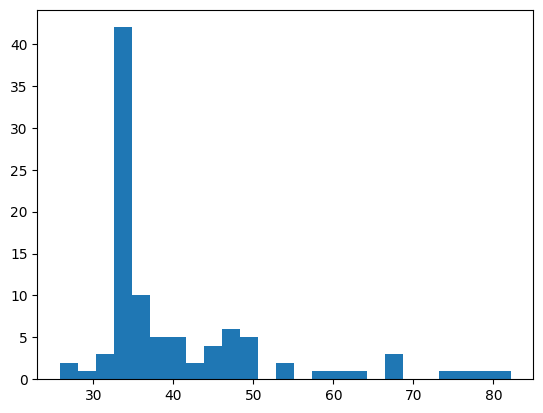

In [32]:
import matplotlib.pyplot as plt
plt.hist(df_pv.loc[df_pv["postal_code"]=="75011","price_per_sqm"].tolist(),bins = 25)
plt.show()

In [22]:
predict(model = catboost_model,X = df_test,cat_cols = CATEGORICAL)

array([43.20206908, 43.61775971, 37.59770745])